# Install and Import Dependencies

In [2]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cpu


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2.Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\DeLL/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.12 torch-1.8.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3.Make Detections with Images

In [11]:
img = 'https://cdn.vox-cdn.com/thumbor/GL2iQe8qGfbhJ047AXmNi5ULtY4=/0x0:3600x2475/920x613/filters:focal(1512x950:2088x1526):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/66466422/GettyImages_1183778347.0.jpg'

In [12]:
results = model(img)
results.print()

image 1/1: 613x920 1 person, 1 bicycle, 26 cars, 5 trucks, 3 traffic lights
Speed: 19829.0ms pre-process, 481.6ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


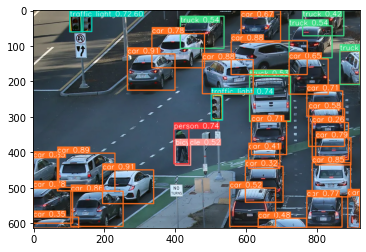

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

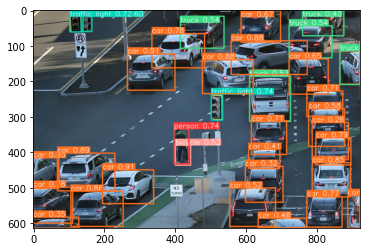

In [14]:
plt.imshow(np.squeeze(results.render()))

In [15]:
results.render()

[array([[[142, 128, 101],
         [142, 128, 101],
         [144, 131, 103],
         ...,
         [ 81,  80,  73],
         [ 63,  62,  54],
         [ 59,  58,  49]],
 
        [[143, 129, 102],
         [142, 128, 101],
         [141, 127, 100],
         ...,
         [ 67,  66,  59],
         [ 54,  53,  44],
         [ 55,  54,  45]],
 
        [[158, 145, 117],
         [154, 140, 113],
         [147, 133, 106],
         ...,
         [ 42,  41,  35],
         [ 49,  48,  40],
         [ 54,  53,  44]],
 
        ...,
 
        [[255, 112,  31],
         [255, 112,  31],
         [164,  91,  55],
         ...,
         [152,  83,  42],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [202,  94,  35],
         ...,
         [205,  98,  35],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [255, 112,  31],
  

# 4.Real Time Detections

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5.Train from Scratch

In [16]:
import uuid   # Unique identifier
import os
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['tanks', 'drones']
number_imgs = 20

In [18]:
cap = cv2.VideoCapture('\\C:\\Users\\DeLL\\Jupyter_Projects\\data\\images')
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [19]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\tanks.0b2338f3-2603-11ed-bba8-f01faf147c10.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)


data\images\tanks.b9a0c266-2516-11ed-85f3-f01faf147c10.jpg
data\images\tanks.b9a0c267-2516-11ed-b9b5-f01faf147c10.jpg
data\images\tanks.b9a0c268-2516-11ed-8def-f01faf147c10.jpg
data\images\tanks.b9a0e972-2516-11ed-a725-f01faf147c10.jpg
data\images\tanks.b9a0e973-2516-11ed-9bd5-f01faf147c10.jpg
data\images\tanks.b9a11072-2516-11ed-a2c6-f01faf147c10.jpg
data\images\tanks.b9a11073-2516-11ed-a1de-f01faf147c10.jpg
data\images\tanks.b9a11074-2516-11ed-93d7-f01faf147c10.jpg
data\images\tanks.b9a11075-2516-11ed-a2ac-f01faf147c10.jpg
data\images\tanks.b9a13771-2516-11ed-a9a8-f01faf147c10.jpg
data\images\tanks.b9a13772-2516-11ed-a6ba-f01faf147c10.jpg
data\images\tanks.b9a13773-2516-11ed-b200-f01faf147c10.jpg
data\images\tanks.b9a13774-2516-11ed-b7d9-f01faf147c10.jpg
data\images\tanks.b9a15e74-2516-11ed-9b60-f01faf147c10.jpg
data\images\tanks.b9a15e75-2516-11ed-b07f-f01faf147c10.jpg
data\images\tanks.b9a15e76-2516-11ed-ab69-f01faf147c10.jpg
data\images\tanks.b9a15e77-2516-11ed-afcb-f01faf147c10.j

In [20]:
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [21]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [39]:
!cd yolov5 && python train.py --img 320 --batch 2 --epochs 400 --data coco128.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=400, batch_size=2, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 8 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.2-53-gf0e5a60 Python-3.9.12 torch-1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

# 6.Load Model

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\DeLL/.cache\torch\hub\master.zip
YOLOv5  2022-8-27 Python-3.9.12 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [28]:
img = os.path.join('data', 'images', 'drones.6ee8c251-2442-11ed-8a6a-f01faf147c10.jpg')

In [29]:
results = model(img)

In [30]:
results.print()

image 1/1: 600x400 (no detections)
Speed: 13.0ms pre-process, 411.0ms inference, 0.0ms NMS per image at shape (1, 3, 640, 448)


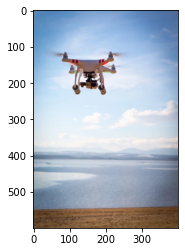

In [31]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [29]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()